# Lab 4.01 - Bivariate Analysis of Qualitative Data


In [46]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib as mpl                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 1 - soft-drinks


The file softdrinks.xlsx categorizes 250 randomly 
selected consumers on the basis of their gender, their 
age, and their preference for our brand or a competitor's brand of a low-calorie soft drink. Use a chi-square test for independence to see whether the drink 
preference is independent of gender, and then whether 
it is independent of age.  First make a plot

Results of the main calculations:
- age vs preference
  - χ² ≈ 3.8589  
  - p-value = 0.2771
  - We do not reject H0


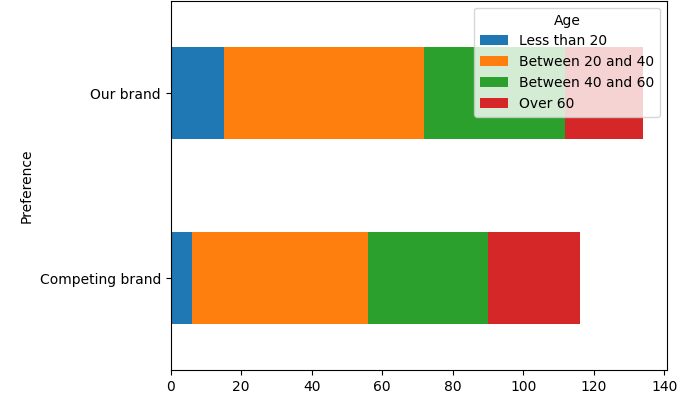



- gender vs preference
  - χ² ≈ 1.4078 
  - p-value = 0.2354
  - We do not reject H0

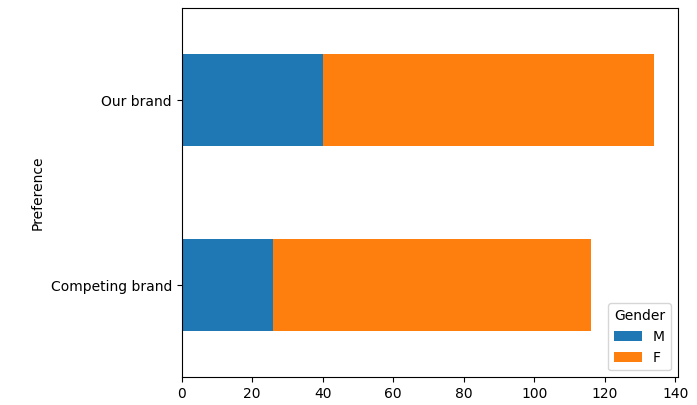

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Softdrinks.csv', sep=";", index_col=0)
df['Age'] = df['Age'].astype(CategoricalDtype(categories=['Less than 20','Between 20 and 40', 'Between 40 and 60', 'Over 60'], ordered=True))
df.head()

,Gender,Age,Preference
Consumer,,,
1,F,Over 60,Our brand
2,F,Between 40 and 60,Our brand
3,M,Between 40 and 60,Our brand
4,F,Over 60,Competing brand
5,M,Between 20 and 40,Our brand


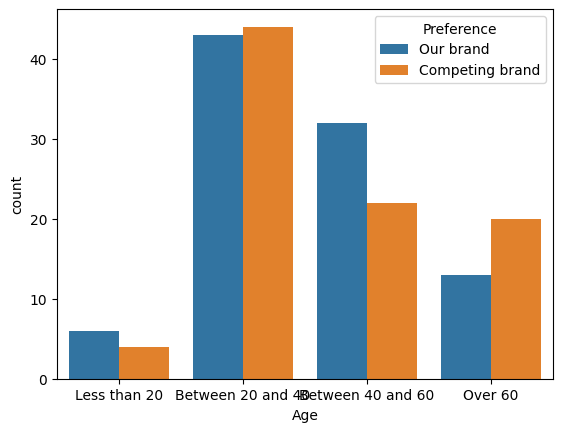

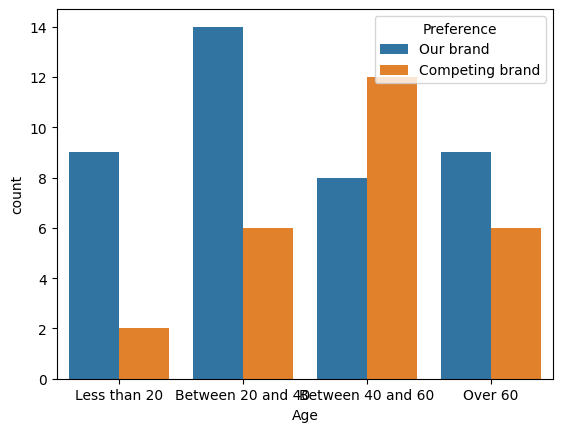

In [76]:
sns.countplot(data=df, x='Age', hue=df[df['Gender'] == 'F']['Preference']);mpl.pyplot.show()
sns.countplot(data=df, x='Age', hue=df[df['Gender'] == 'M']['Preference']);mpl.pyplot.show()

In [75]:
pd.crosstab([df.Gender,df.Age],df.Preference)

Preference                Competing brand  Our brand
Gender Age                                          
F      Less than 20                     4          6
       Between 20 and 40               44         43
       Between 40 and 60               22         32
       Over 60                         20         13
M      Less than 20                     2          9
       Between 20 and 40                6         14
       Between 40 and 60               12          8
       Over 60                          6          9

### Age vs Brand

<Axes: ylabel='Preference'>

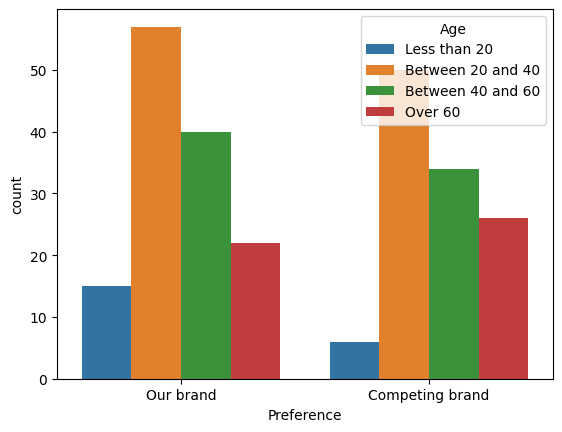

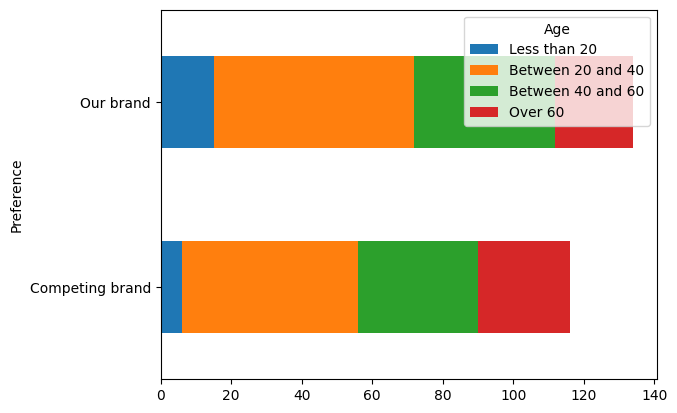

In [85]:
sns.countplot(data=df, x=df.Preference, hue=df.Age)
pd.crosstab(df.Preference, df.Age).plot(kind='barh', stacked=True)

In [87]:
observed = pd.crosstab(df.Preference, df.Age)
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()

print(row_sums)
print(col_sums)
print(f'Number of observations: {n}')

expected = np.outer(row_sums, col_sums) / n
expected

exp_row_sums = np.sum(expected, axis=1)
exp_col_sums = np.sum(expected, axis=0)

print(f'Row totals   : {exp_row_sums}')
print(f'Column totals: {exp_col_sums}')
print(f'Observations : {exp_col_sums.sum()}')

expected - observed

diffs = (expected - observed)**2 / expected
print(diffs)

chi_squared = diffs.values.sum()
print('χ² ≈ %.3f' %chi_squared)

dof = min(observed.shape) - 1
cramers_v = np.sqrt(chi_squared / (dof * n))
print(cramers_v)

stats.contingency.association(observed, method='cramer')

Preference
Competing brand    116
Our brand          134
dtype: int64
Age
Less than 20          21
Between 20 and 40    107
Between 40 and 60     74
Over 60               48
dtype: int64
Number of observations: 250
Row totals   : [116. 134.]
Column totals: [ 21. 107.  74.  48.]
Observations : 250.0
Age              Less than 20  Between 20 and 40  Between 40 and 60   Over 60
Preference                                                                   
Competing brand      1.438581           0.002496           0.003288  0.624011
Our brand            1.245339           0.002160           0.002846  0.540189
χ² ≈ 3.859
0.12424027040933154


0.12424027040933154

In [ ]:
observed = pd.crosstab(df.Preference, df.Age)
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()
expected = np.outer(row_sums, col_sums) / n
diffs = (expected - observed)**2 / expected
chi_squared = diffs.values.sum()
print('χ² ≈ %.3f' %chi_squared)

dof = min(observed.shape) - 1
cramers_v = np.sqrt(chi_squared / (dof * n))
print(cramers_v)

stats.contingency.association(observed, method='cramer')

χ² ≈ 3.859
0.12424027040933154


0.12424027040933154

In [89]:
observed = pd.crosstab(df.Preference, df.Age)
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()
expected = np.outer(row_sums, col_sums) / n
diffs = (expected - observed)**2 / expected
chi_squared = diffs.values.sum()
print('χ² ≈ %.3f' %chi_squared)

χ² ≈ 3.859


### Gender vs Brand

In [90]:
observed = pd.crosstab(df.Preference, df.Gender)
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()
expected = np.outer(row_sums, col_sums) / n
diffs = (expected - observed)**2 / expected
chi_squared = diffs.values.sum()
print('χ² ≈ %.3f' %chi_squared)

χ² ≈ 1.770
